# Week 11 Assignment : Aggregation

* Importing pandas modules and matplotlib for Ipython Notebook operations.

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, read_csv
%matplotlib inline
pd.options.display.max_rows = 200

## Accessing / Opening the CSV file:

Create the demographics object, for hold the data read from parsing through the file <i> us_demographics.csv </i>. 
* Below we will use the read_csv to load this into the notebook.

In [2]:
demographics = pd.read_csv('us_demographics.csv', dtype={'id': int})

In [3]:
demographics.head()

,Sex and age,2000,2010
0,Male,138053563,151781326
1,Female,143368343,156964212
2,Under 5 years,19175798,20201362
3,5 to 9 years,20549505,20348657
4,10 to 14 years,20528072,20677194


In [4]:
demographics = pd.melt(demographics, id_vars=['Sex and age'],
                     value_vars = ['2000', '2010'], value_name = 'Population')

In [5]:
demographics.columns = ['Sex / Age', 'Year', 'Population']

In [6]:
demographics.head()

,Sex / Age,Year,Population
0,Male,2000,138053563
1,Female,2000,143368343
2,Under 5 years,2000,19175798
3,5 to 9 years,2000,20549505
4,10 to 14 years,2000,20528072


In [7]:
demographics = demographics[demographics['Sex / Age'] != 'Male']
demographics = demographics[demographics['Sex / Age'] != 'Female']

In [8]:
year2010 = demographics.loc[demographics['Year'] == '2010'].sum()['Population']
year2000 = demographics.loc[demographics['Year'] == '2000'].sum()['Population']

In [9]:
demographics[demographics['Year'] != '2000']

,Sex / Age,Year,Population
21,Under 5 years,2010,20201362
22,5 to 9 years,2010,20348657
23,10 to 14 years,2010,20677194
24,15 to 19 years,2010,22040343
25,20 to 24 years,2010,21585999
26,25 to 34 years,2010,41063948
27,35 to 44 years,2010,41070606
28,45 to 54 years,2010,45006716
29,55 to 59 years,2010,19664805
30,60 to 64 years,2010,16817924


In [10]:
demographics[demographics['Year'] != '2010']

,Sex / Age,Year,Population
2,Under 5 years,2000,19175798
3,5 to 9 years,2000,20549505
4,10 to 14 years,2000,20528072
5,15 to 19 years,2000,20219890
6,20 to 24 years,2000,18964001
7,25 to 34 years,2000,39891724
8,35 to 44 years,2000,45148527
9,45 to 54 years,2000,37677952
10,55 to 59 years,2000,13469237
11,60 to 64 years,2000,10805447


In [11]:
demographics

,Sex / Age,Year,Population
2,Under 5 years,2000,19175798
3,5 to 9 years,2000,20549505
4,10 to 14 years,2000,20528072
5,15 to 19 years,2000,20219890
6,20 to 24 years,2000,18964001
7,25 to 34 years,2000,39891724
8,35 to 44 years,2000,45148527
9,45 to 54 years,2000,37677952
10,55 to 59 years,2000,13469237
11,60 to 64 years,2000,10805447


In [12]:
demo_group = demographics.groupby('Sex / Age')

After the groupby function, we check to make sure we have desired number of groups set.

In [13]:
demo_group.ngroups

17

Using the groups function to tell us what groups are in our demo_group and also the rows index where these groups where found and sliced from.

In [14]:
demo_group.groups

{'10 to 14 years': [4, 23],
 '15 to 19 years': [5, 24],
 '18 years and over': [15, 34],
 '20 to 24 years': [6, 25],
 '21 years and over': [16, 35],
 '25 to 34 years': [7, 26],
 '35 to 44 years': [8, 27],
 '45 to 54 years': [9, 28],
 '5 to 9 years': [3, 22],
 '55 to 59 years': [10, 29],
 '60 to 64 years': [11, 30],
 '62 years and over': [17, 36],
 '65 to 74 years': [12, 31],
 '65 years and over': [18, 37],
 '75 to 84 years': [13, 32],
 '85 years and over': [14, 33],
 'Under 5 years': [2, 21]}

Similarly but with less details size can give us an idea of the size among each particular group, for our dataset it is two.

In [15]:
demo_group.size()

Sex / Age
10 to 14 years       2
15 to 19 years       2
18 years and over    2
20 to 24 years       2
21 years and over    2
25 to 34 years       2
35 to 44 years       2
45 to 54 years       2
5 to 9 years         2
55 to 59 years       2
60 to 64 years       2
62 years and over    2
65 to 74 years       2
65 years and over    2
75 to 84 years       2
85 years and over    2
Under 5 years        2
dtype: int64

To access the results of grouping we will create a function to do so below:

In [19]:
def print_demo(group_object):
    for name, group in group_object:
        print name
        print '-'*20
        print group
        group.plot(title='Population :'+name)
        print '='*40
        print '\n'

10 to 14 years
--------------------
         Sex / Age  Year  Population
4   10 to 14 years  2000    20528072
23  10 to 14 years  2010    20677194


15 to 19 years
--------------------
         Sex / Age  Year  Population
5   15 to 19 years  2000    20219890
24  15 to 19 years  2010    22040343


18 years and over
--------------------
            Sex / Age  Year  Population
15  18 years and over  2000   209128094
34  18 years and over  2010   234564071


20 to 24 years
--------------------
         Sex / Age  Year  Population
6   20 to 24 years  2000    18964001
25  20 to 24 years  2010    21585999


21 years and over
--------------------
            Sex / Age  Year  Population
16  21 years and over  2000   196899193
35  21 years and over  2010   220958853


25 to 34 years
--------------------
         Sex / Age  Year  Population
7   25 to 34 years  2000    39891724
26  25 to 34 years  2010    41063948


35 to 44 years
--------------------
         Sex / Age  Year  Population
8   35 to

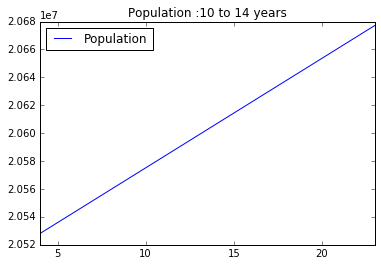

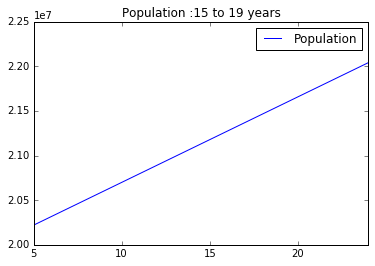

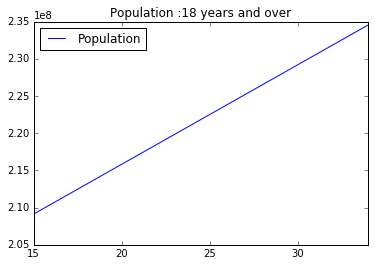

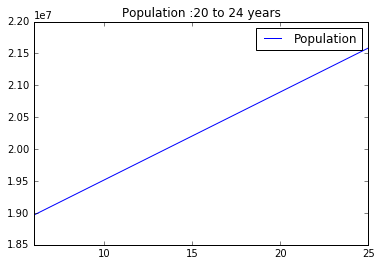

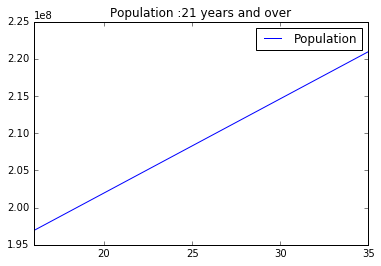

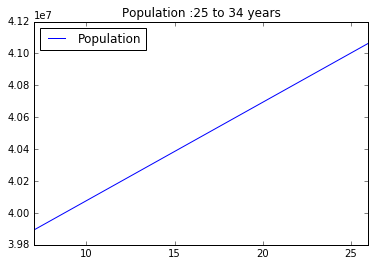

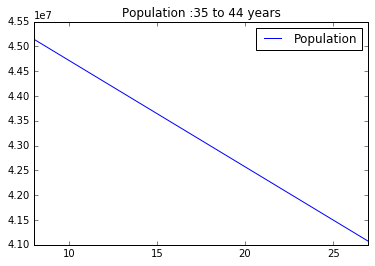

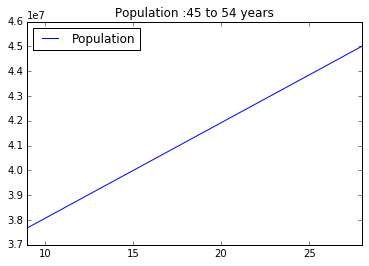

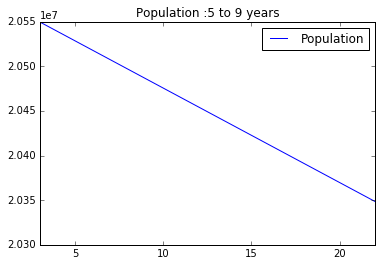

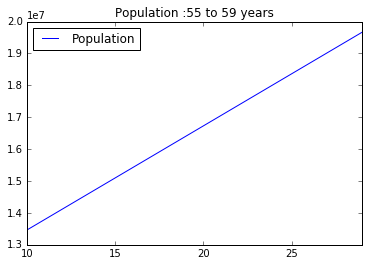

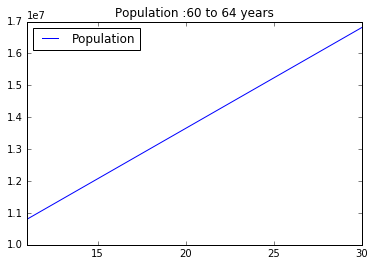

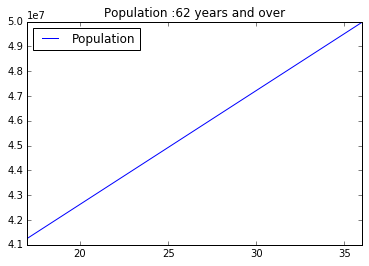

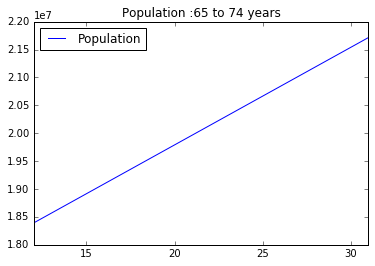

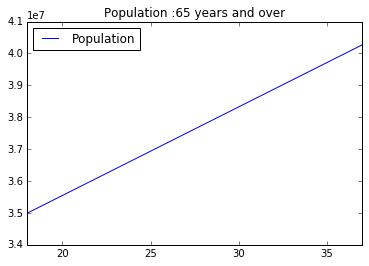

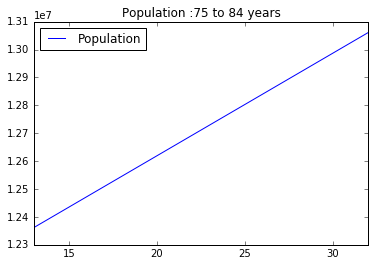

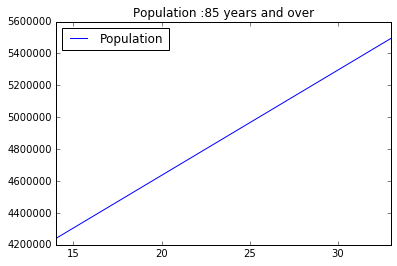

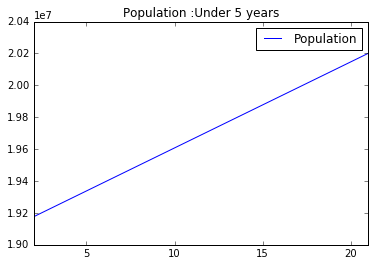

In [20]:
print_demo(demo_group)

With this grouping we can see the differences between age groups population in 2000 and 2010 continously as the function displays, the description of the data and group plots visualization.